# The Do-calculus


$$P(y_x|x',y')$$
$$P(Y_x) = P(Y|do(x)) = P_x(Y)$$


## Rule 1: Ignoring observations


$$\newcommand\ci{\perp\!\!\!\perp}$$
$$\newcommand{\ubar}[1]{\underset{\bar{}}{#1}}
\newcommand{\obar}[1]{\overset{\bar{}}{#1}}$$

$$P(y|do(x),{\color{blue}z},w) = P(y|do(x),w)\text{ if } ( Y\ci Z|X,W )_{G_{\bar{X}}}$$

or in the Shpitser notation:

$$P_x(y|{\color{blue}z},w) = P_x(y|w)\text{ if } ( Y\ci Z|X,W )_{G_{\bar{X}}}$$

## Rule 2: Action/Observation Change

$$P(y|do(x), \color{red}{do(z)}, w) = P(y|do(x),\color{red} z, w)\text{ if } (Y\ci Z|X,W)_{G_{\bar{X},\ubar{Z}}}$$
or in Shpitser notation:

$$P_{x,\color{red}z}(y|w) = P_x(y|\color{red}z,w) \text{ if } (Y\ci Z|X,W)_{G_{\bar{X},\ubar{Z}}}$$

Where $G_{\bar{X},\ubar{Z}}$  is taken to mean the graph obtained from $G$ by removing arrows pointing to $X$ and arrows leaving $Z$. 

# Rule 3: Ignoring actions

$$P(y|do(x),\color{green}{do(z)},w) = P(y|do(x),w)\text{ if }(Y\ci Z|X,W)_{G_{\bar{X}\bar{Z(W)}}}$$

where $Z(W)$ is the set of $Z$ nodes not ancestors of any $W$-node in $G_{\bar{X}}$.



# Theorem 2: The bow arc is not identifiable.

We construct two causal models $M^1$ and $M^2$ such that $P^1(X, Y)=P^2(X, Y)$ ,and $P^1_x(Y)\ne P^2_x(Y)$.The two models agree on the following: all 3 variables are boolean, $U$ is a fair coin, and $f_X(u)=u$.Let $⊕$ denote the exclusive or (XOR) function. Then the value of $Y$ is determined by the function $u⊕x$ in $M^1$, while $Y$ is set to $0$ in $M^2$. Then $P^1(Y=0)=P^2(Y=0)=1$, $P^1(X=0)=P^2(X=0)=0.5$. Therefore, $P^1(X, Y)=P^2(X, Y)$, while $P^2_x(Y=0)=1\ne P^1_x(Y=0)=0.5$. Note that while $P$ is non-positive, it is straightforward to modify the proof for the positive case by letting $f_Y$ functions in both models return 1 half the time, and the values outlined above half the time.

In [ ]:
from scipy.stats import bernoulli
def Model1(u):
    x = u
    y = x ^ u
    return x, y

def Model2(u):
    x = u
    y = 0
    return x,y
def sample(size=1000, p=0.5):
    u = bernoulli.rvs(p, size=size)
    unique, counts = numpy.unique(u, return_counts=True)
    return dict(zip(unique, [c/size for c in counts]))
def P1(X=None,Y=None,p=0.5, size=1000):
    u = bernoulli.rvs(p,size=size)
    joint = [Model1(u_i) for u_i in u]
    count = 0

        for x,y in joint: 
            if X and Y and X==x and Y==y:
                count +=1
            elif
            
    

        dict(zip(unique, counts))

# C-component
Let $G$ be a semi-Markovian graph such that a subset of its bidirected arcs forms a spanning tree over all vertices in $G.$Then $G$ is a C-component(confounded component).

Let a path composed entirely of bidirected
edges be called a bidirected path. The set of variables $V$ can
be partitioned into disjoint groups by assigning two variables
to the same group if and only if they are connected by a
bidirected path. 

# Definition 4: (C-tree)

Let $G$ be a semi-Markovian graph such that $G$ is a C-component, all observable nodes have at most one child, and there is a node $Y$ such that $An(Y)_G= G$.Then $G$ is a $Y$-rooted C-tree (confounded tree).


# A tree is not a Computer science tree!

In computer science, the root of a tree has no parents, and the leaves have no children. And all children have only one parent.

In the Pearlian world, the root of a tree has no children, and all nodes have at most one child. The issue is that the arrows point in the opposite direction.  

# $An( Y )$ includes $Y$!

From "[A General Identification Condition for Causal Effects](https://ftp.cs.ucla.edu/pub/stat_ser/R290-A.pdf)" by Tian and Pearl 2002:

Let  $An( S )$ denote  the  union  of  a  set $S$ and  the  set  of ancestors of the variables in $S$, and let $G_{An( S )}$ denote the subgraph of $G$ composed only of variables in $An( S )$.

# A complete identification algorithm. 

**FAIL** propagates through recursive calls like an exception, and returns the hedge which witnesses non-identifiability. $V_\pi^{(i-1)}$ is the set of nodes preceding $V_i$ in some topological ordering $\pi$ in $G$.

1. If no action has been taken, the effect on $\mathbf Y$ is just the marginal of the observational distribution $P(\mathbf v)$ on $\mathbf Y$. 
2. If we are interested in the effect on $\mathbf Y$, it is sufficient to restrict our attention on the parts of the model ancestral to $\mathbf Y$.
3. Forces an action on any node where such an action would have no effect on $\mathbf Y$—assuming we already acted on $\mathbf X$. Since actions remove incoming arrows, we can view line 3 as simplifying the causal graph we consider by removing certain arcs from the graph, without affecting the overall answer.
4. The key line of the algorithm, it decomposes the problem into a set of smaller problems using the key property of *c-component factorization* of causal models. If the entire graph is a single C-component already, further problem decomposition is impossible, and we must provide base cases. $\mathbf{ID}$ has three base cases. 
5. Fails because it finds two C-components, the graph $G$ itself, and a subgraph $S$ that does not contain any $\mathbf X$ nodes. But that is exactly one of the properties of C-forests that make up a hedge. In fact, it turns out that it is always possible to recover a hedge from these two c-components.
6. Asserts that if there are no bidirected arcs from X to the other nodes in the current subproblem under consideration, then we can replace acting on X by conditioning, and thus solve the subproblem. 
7. The most complex case where $\mathbf X$ is partitioned into two sets, $\mathbf W$ which contain bidirected arcs into other nodes in the subproblem, and $\mathbf Z$ which do not. In this situation, identifying $P(\mathbf y|do(\mathbf x))$ from $P(v)$ is equivalent to identifying $P(\mathbf y|do(\mathbf w))$ from $P(\mathbf V|do(\mathbf z))$, since $P(\mathbf y|do(\mathbf x)) = P(\mathbf y|do(\mathbf w), do(\mathbf z))$. But the term $P(\mathbf V|do(\mathbf z))$ is identifiable using the previous base case, so we can consider the subproblem of identifying $P(\mathbf y|do(\mathbf w))$.


$\text{function }\mathbf{ID}\left(\mathbf y, \mathbf x, P, G\right) \\ \text{INPUT: } \mathbf{x,y}\text{ value assignments, $P$ a probability distribution, $G$ a causal diagram}. \\  \text{OUTPUT:  Expression for $P_{\mathbf x}(\mathbf y)$ in terms of $P$ or $\mathbf{FAIL}(F, F')$} $



1. $\text{if }{\mathbf x} =\emptyset \text{ return }\sum_{\mathbf v - \mathbf y}P({\mathbf v})$. &nbsp;&nbsp;&nbsp; 
2. $\text{if }\mathbf V - An(\mathbf Y)_G \neq \emptyset \\  \text{ return } \mathbf{ ID}\left(\mathbf y, \mathbf x\cap An(\mathbf Y)_G, \sum_{\mathbf V - An(Y)_G}P, G_{An(\mathbf Y)}\right)$.
3. $\text{let }\mathbf W = (\mathbf V - X) - An(\mathbf Y)_{G_{\bar{\mathbf X}}}. \\ \text{if } \mathbf W \neq \emptyset, \text{ return } \mathbf{ID}\left(\mathbf y, \mathbf x\cup \mathbf w, P, G\right)$.
4. $\text{if }C(G-\mathbf X) = \{S_1,\ldots S_k\} \\ \text{ return }\sum_{\mathbf v - (\mathbf y \cup \mathbf x)}\prod_i\mathbf{ID}\left(s_i, \mathbf v - s_i, P, G\right) \\ \text{if }C(G -\mathbf X) = \{S\}$
5. &nbsp; &nbsp;&nbsp;$\text{       if }C(G) = \{G\},\\  \text{ throw }\mathbf{FAIL}\left(G,G\cap S\right)$.
6. &nbsp; &nbsp;&nbsp;$\text{ if }S\in C(G) \\ \text{ return }\sum_{S - \mathbf y}\prod_{\{i|V_i\in S\}}P\left(v_i|v_\pi^{(i-1)}\right)$
7. &nbsp; &nbsp;&nbsp;$\text{ if }(\exists S')S\subset S'\in C(G) \\ \text{ return }\mathbf{ID}\left(\mathbf y, \mathbf x\cap S', \prod_{\{i|V_i\in S'\}}P(V_i|V_\pi^{(i-1)}\cap S', V_\pi^{(i-1)} - S'), G_{S'}\right)$.



In [1]:
from y0.dsl import P, Sum, X, Y, Z, Product
from y0.mutate import canonicalize
expected = Sum[Z](P(Y,Z))
actual = Sum[Z](P(Z, Y))
expected_vars = expected.get_variables()
ordering = list(expected_vars)
expected_canonical = canonicalize(expected, ordering)
actual_canonical = canonicalize(actual, ordering)

print(f"Expected: {expected_canonical}\nActual:   {actual_canonical}")

Expected: [ sum_{Z} P(Y,Z) ]
Actual:   [ sum_{Z} P(Y,Z) ]


In [9]:
from ananke.graphs import ADMG
from y0.examples import vertices_without_edges, line_2_example, line_3_example
from y0.identify import _get_outcomes, _get_treatments
from y0.algorithm.identify import line_2, line_3, query_to_outcomes_and_treatments
from y0.mutate import canonicalize, expr_equal

from y0.graph import NxMixedGraph
admg = ADMG(vertices=['X','Y', 'Z'], di_edges=[['X','Y'],['Y','Z']], bi_edges=[['X','Z']])
expected = vertices_without_edges
actual = NxMixedGraph.from_admg( admg )
set(expected.graph.directed.nodes())

{'X', 'Y', 'Z'}

{Variable(name='Y'), Variable(name='X'), Variable(name='Z')}


None

{Variable(name='Y'), Variable(name='X'), Variable(name='Z')}


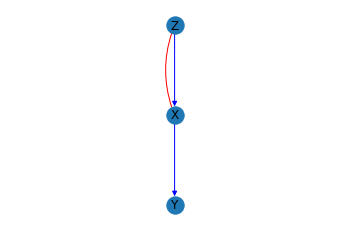

In [3]:
for identification in line_3_example.identifications:
    for id_in in identification['id_in']:
        print(id_in.estimand.get_variables())
        display(id_in.graph.draw())
    for id_out in identification['id_out']:
        print(id_out.estimand.get_variables())
        #display(id_out.graph.draw())

None

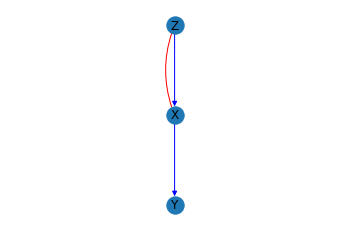

In [4]:
display(id_out.graph.draw())

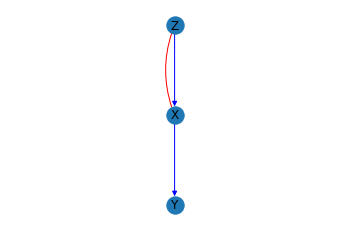

In [6]:
outcomes, treatments = query_to_outcomes_and_treatments( query=id_in.query )
line3_id = line_3(outcomes=outcomes,
                  treatments=treatments,
                  estimand=id_in.estimand,
                  G= id_in.graph)
line3_id.graph.draw()

In [10]:
expr_equal(line3_id.query, id_out.query)

False

In [15]:
set(line3_id.query.get_variables()) == set(id_out.query.get_variables())


False

In [13]:
line3_id.query

P(Distribution(children=(CounterfactualVariable(name='Y', interventions=(Intervention(name='Z', star=False), Intervention(name='X', star=False))),), parents=()))

In [16]:
expr_equal(P(Y @[Z,X]), P(Y @ [X,Z]))

False

In [17]:
P(Y @ [Z,X]).get_variables() 

{Intervention(name='X', star=False),
 CounterfactualVariable(name='Y', interventions=(Intervention(name='Z', star=False), Intervention(name='X', star=False))),
 Intervention(name='Z', star=False)}

In [19]:
P(Y @ [X, Z]).get_variables()

{Intervention(name='X', star=False),
 CounterfactualVariable(name='Y', interventions=(Intervention(name='X', star=False), Intervention(name='Z', star=False))),
 Intervention(name='Z', star=False)}

In [8]:
id_out.query

P(Distribution(children=(CounterfactualVariable(name='Y', interventions=(Intervention(name='X', star=False), Intervention(name='Z', star=False))),), parents=()))

In [5]:
id_out.estimand

Sum(expression=P(Distribution(children=(Variable(name='Y'), Variable(name='Z')), parents=())), ranges=(Variable(name='Z'),))